
# Cambio de coordenadas e regra da cadea


In [1]:
import time
print(' Última execución ', time.asctime() )

 Última execución  Sat Feb 17 22:29:18 2024



### Obxectivos

 Aprende a facer cambios de coordenadas

 Mostra a regra da cadea e algúns usos.


*Nota*

Para que este notebook funcione en colab, precisamos <a href = "https://www.dropbox.com/scl/fi/wwz2w43kqj0s38gm87roj/graph_utils.py?rlkey=rppkwu9tmbnnsojezzj69p1r0&dl=1"> graph_utils.py </a>. Podes descargalo premendo na ligazón, e subilo a colab:


<img src="https://www.dropbox.com/scl/fi/b35vcated0f9lwrw4jy01/colab_upload.jpg?rlkey=l1ag15r0ovkg2dsefze117k1y&raw=1" width=200 align="center" />

In [2]:
# general imports
# general imports
%matplotlib inline
%reload_ext autoreload
%autoreload 2

# numpy and matplotlib
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
matplotlib.style.use('ggplot')
import graph_utils as gf


### Cambio de variables

 A seguinte función é o potencial dunha carga eléctrica, $q$ no espazo:

 $$
 V(x, y, z) = k \frac{q}{\sqrt{x^2 + y^2 + z^2}}
 $$

 Sabemos que o potencial é radial, o que só depende da distancia á carga, $r = \sqrt{x^2 + y^2 + z^2}$.

 Podemos expresar o potencial en *coordenadas cartesianas* , como na ecuación anterior, pero tamén, máis simplemente, en *coordenadas esféricas* , onde a variable $r$ é a distancia á orixe, así:

 $$
 V(r) = k \frac{q}{r}
 $$

 Neste caso só depende de $r$



Na sección de parametrización da superficie, vimos que podíamos dar a parede dun cilindro de raio $r$ e altura infinita como:

 $$
 \sigma(\phi, z) = ( r \cos \phi, r \sin \phi, z)
 $$

 Onde o raio, $r$, era unha constante. Se agora consideramos que $r$ pode tomar todos os valores de $[0, \infty)$. O conxunto de todas as *tapas* de cilindros, *cobre* ou *mapea*, o espazo tridimensional.


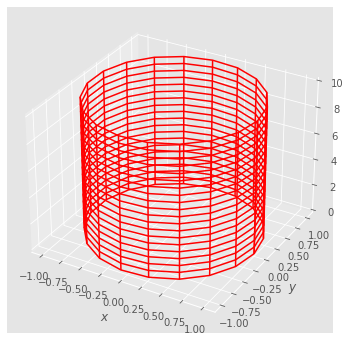

In [3]:
phi_range = (0, 2*np.pi, 20)
z_range   = (0,      10, 20)
r = 1.
funx = lambda phi, z: r  * np.cos(phi)
funy = lambda phi, z: r  * np.sin(phi)
funz = lambda phi, z: z
gf.wfsurface(funx, funy, funz, phi_range, z_range);


Podemos dar todos os puntos, $(x, y, z)$, dun espazo $\mathbb{R}^3$ en *coordenadas cilíndricas* , onde expresamos as coordenadas $(x, y)$ por, $(r, \phi)$ onde $r$ é a distancia á orixe e $\phi$ o ángulo co eixe $x$. Mentres mantemos a coordenada $z$. Isto é:

 $$
 (r, \phi, z) \to (x, y, z)
 $$

 Onde:

 $$
 x = r \cos \phi, \;\,
 y = r \sin \phi, \;\,
 z = z
 $$

 O dominio en cilíndricas é $r \in [0, \infty)$, $\phi \in [0, 2 \pi)$, mentres que $z$ é todo $\mathbb{R}$.

 *Exercicio* : Cal é a transformación inversa, de cartesianas a cilíndricas?



A transformación inversa, de *cilíndricas* a *cartesianas,* vén dada por:

 $$
 r = \sqrt{x^2 + y^2}, \, \cos \phi = \frac{x}{\sqrt{x^2 + y^2}}, \;\, z = z
 $$



Se lembras, tamén parametrizamos unha esfera de raio $r$:

 $$
 \sigma(\theta, \phi) = (r \cos \phi \sin \theta, \; r \sin \phi \sin \theta, \; r \cos \theta)
 $$

 Considerando agora todas as esferas posibles, é dicir, variando $r$ de $[0, \infty)$ podemos volver cubrir todo o espazo tridimensional, $\mathbb{R}^3$


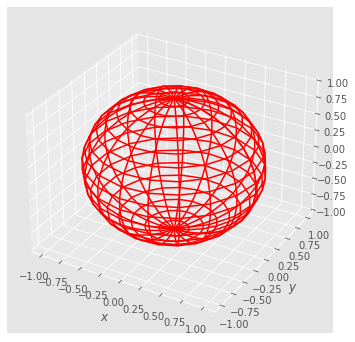

In [4]:
theta_range = 0.,    np.pi, 20
phi_range   = 0., 2.*np.pi, 20
r = 1.
funx = lambda theta, phi : r * np.cos(phi) * np.sin(theta)
funy = lambda theta, phi : r * np.sin(phi) * np.sin(theta)
funz = lambda theta, phi : r               * np.cos(theta)
gf.wfsurface(funx, funy, funz, theta_range, phi_range);


*As coordenadas esféricas* permítennos asociar calquera punto do espazo, $(x, y, z)$, de $\mathbb{R}^3$, a un raio, $r$, a distancia do punto desde a orixe, o ángulo $ \theta$ que forma o punto co eixe $z$, e o ángulo que forma a proxección do punto no plano $(x, y)$ no eixe $x$.

 O cambio a esféricas vén dado por:

 $$
 x = r \cos \phi \sin \theta, \;\, y = r \sin \phi \sin \theta, \;\, z = r \cos \theta
 $$

 Onde o rango de $\theta$ é $[0, \pi]$ e o de $\phi$ é $[0, 2 \pi)$.

<img src="
https://upload.wikimedia.org/wikipedia/commons/thumb/4/4f/3D_Spherical.svg/800px-3D_Spherical.svg.png" width=400 align="center" />

 Con $\theta = 0, \pi$ damos os polos da esfera, con $\theta = \pi/2$ o seu ecuador. Situado a unha altura da esfera, o ángulo $\phi$, permítenos viaxar ao seu redor nun círculo de raio $r \sin \theta$ en sentido antihorario (visto desde arriba). No ecuador, por suposto, cun raio $r$.

 *Exercicio:* Cal é o cambio inverso que nos leva de cartesianas a esféricas?



O cambio inverso de cartesianas a esféricas vén dado por:

 $$
 r = \sqrt{x^2 + y^2 + z^2}, \;\, \cos \phi = \frac{x}{\sqrt{x^2 + y^2}}, \;\, \cos \theta = \frac{z}{\sqrt{x^2 + y^2 + z^2}}
 $$



#### Cambios de coordenadas

 Os cambios de coordenadas son polo tanto funcións vectoriais, ${\bf f}: \mathbb{R}^n \to \mathbb{R}^n$, diferenciables, bixectivas (agás algún punto singular) e que admiten tamén unha función inversa, tamén diferenciable.

 *Nota:* unha función bixectiva asocia cada punto do espazo inicial cun punto diferente do espazo da imaxe, e cada punto do espazo da imaxe ten un punto no inicial. Ten en conta que hai algúns puntos singulares que non cumpren con isto, como os polos no cambio a esférico e cando $r = 0$ para ambos. Non obstante, isto non nos impide cubrir completamente o espazo $\mathbb{R}^3$


#### Matriz de cambio de coordenadas xacobianas

 Imos calcular a matriz xacobiana dos cambios de coordenadas a cilíndricas.

 A función vectorial do cambio de coordenadas a cilíndricas é:
 
$$
{\bf x}(r, \phi, z) \; =  \, \left( r \cos \phi, \, r \sin \phi, \,  z \right)
$$

 E a súa matriz xacobiana:

$$
{\bf Dx}(r, \phi, z) = \left( \begin{array}{ccc} 
\cos \phi & - r \sin \phi & 0 \\
\sin \phi &   r \cos \phi & 0 \\
        0 &             0 & 1 
\end{array} \right)
$$



A función vectorial do cambio de coordenadas a esféricas é:

$$
{\bf x}(r, \phi, \theta) \; =  \, \left( r \cos \phi \sin \theta, \, r \sin \phi \sin \theta, \,  r \cos \theta \right)
$$


 E a súa matriz xacobiana:

$$
{\bf Dx}(r, \phi, \theta) = \left( \begin{array}{ccc} 
\cos \phi \sin \theta & - r \sin \phi \sin \theta &  r \cos \phi \cos \theta \\
\sin \phi \sin \theta &   r \cos \phi \sin \theta &  r \sin \phi \cos \theta \\
          \cos \theta &                         0 & -r \sin \theta  
\end{array} \right)
$$




### A regra da cadea

 En certos casos temos unha función vectorial, ${\bf f}({\bf x})$, de $\mathbb{R}^3$, da que coñecemos a súa derivada, ${\bf Df}({\bf x})$, e preguntámonos cal será a súa derivada en coordenadas cilíndricas ou esféricas.

 Existe unha relación sinxela entre a derivada da función nas novas coordenadas e a derivada nas coordenadas cartesianas?

 A resposta é a regra da cadea, que nos di que a nova derivada é o produto da derivada da primeira función e a derivada, a matriz xacobiana, do cambio de variables:

 Sexa ${\bf f}({\bf x)}$ con derivada, ${\bf Df}({\bf x})$ en cartesianas e ${\bf x}({\bf u})$ un cambio de coordenadas, con matriz xacobiana, ${\bf Dx}({\bf u})$. A función composta, ${\bf h} ({\bf u}) = {\bf f} \circ { \bf x}({\bf u}) = {\bf f}\left({\bf x }({\bf u}) \right)$, ten como derivada:

 $$
 {\bf Dh}({\bf u}) \; = \; {\bf Df} \left({\bf x( {\bf u})} \right) \; {\bf Dx}({\bf u})
 $$

 O produto dos derivadas!


#### Teorema da regra da cadea


*Teorema*: Sexa ${\bf g}: A \subset \mathbb{R}^n \to \mathbb{R}^m$, $A$ un conxunto aberto de $\mathbb{R}^n$, e ${\bf f}: B \subset \mathbb{R}^m \to \mathbb{R}^p$, $B$ un conxunto aberto de $\mathbb{R}^m$, onde o dominio de ${\bf f}$ se inclúe no intervalo de ${\bf g}$. Se ${\bf g}$ é diferenciable nun punto ${\bf x}$ interior a $A$ e ${\bf f}$ o é no punto ${\bf g}({\bf x})$, entón, a función de composición ${\bf h} = {\bf f} \circ {\bf g}: A \subset \mathbb{R}^n \to \mathbb{R}^p$, definida como: ${\bf h}({\bf x})= {\bf f} \circ {\bf g} ({\bf x}) = {\bf f} \left( {\bf g}({\bf x}) \right)$, é diferenciable en ${\bf x}$ e o seu diferencial é:

$$
{\bf D}({\bf f} \circ {\bf g})({\bf x}) = {\bf Df}\left( {\bf g}({\bf x}) \right) \, {\bf Dg}({\bf x}) 
$$



*Exemplo* : coas funcións: $f(x,y)= x^2+y^2$ e ${\bf g}(r,\theta) = (r\cos \theta, r \sin \theta)$ , verifica a regra da cadea para a función composta, $h(r,\theta) = (f \circ {\bf g})(r,\theta)$.



*solución:*
Como produto de derivadas:

$$
\nabla f (x,y)  = (2x, \, 2y) \Rightarrow \nabla f (r,\theta)  = (2 r \cos \theta, \, 2 r \sin \theta) 
$$

$$
{\bf Dg}(r,\theta)  = \left( \begin{array}{cc} 
\cos \theta & - r \sin \theta \\
 \sin \theta & r \cos \theta
\end{array} \right) 
$$

$$
\nabla f (r,\theta) \, {\bf Dg} (r,\theta)  =  (2 r \cos \theta, 2 r \sin \theta) \, \left(
\begin{array}{cc} 
\cos \theta & - r \sin \theta \\
 \sin \theta & r \cos \theta
\end{array} \right) = (2r,0) \\
$$

Agora expresando a función inicial en polares:

$$
 h (r,\theta)  = r^2 
$$

$$
\nabla h (r,\theta) = (2r,0)
$$


*Exercicio* : Verifica a regra da cadea para a función composta
 $h = f \circ {\bf g}: \mathbb{R}^3 \to \mathbb{R}$ dado por $g:\mathbb{R}^3 \to \mathbb{R}^3$, ${\bf g}(x,y,z)=(x^2y,y^2,e^{-xz})$ e $f:\mathbb{R}^3\to\mathbb{R}$ , $f(u,v,w)=u^2+v^2-w$.


*Solución*:

 Substituíndo:

$$
h(x,y,z)  = (x^2y)^2+(y^2)^2-e^{-xz} 
$$

$$
\nabla h(x,y,z)  =(4x^3y^2+ze^{-xz},2x^4y+4y^3,xe^{-xz}) 
$$

 Aplicando a regra da cadea:

$$
{\bf Dg}(x,y,z)  = \left( \begin{array}{ccc}
2xy & x^2 & 0 \\
0 & 2y & 0 \\
-ze^{-xz} & 0 & -xe^{-xz} \\ \end{array} \right) 
$$

$$
\nabla f(u,v,w) = (2u,2v,-1) \Rightarrow \nabla f(x,y,z) = (2x^2y,2y^2,-1) 
$$

$$
\nabla f(x,y,z) \, {\bf Dg}(x,y,z)  =  (2x^2y,2y^2,-1) \, \left( \begin{array}{ccc}
2xy & x^2 & 0 \\
0 & 2y & 0 \\
-ze^{-xz} & 0 & -xe^{-xz} \\ \end{array} \right)  \\
= (4x^3y^2+ze^{-xz},2x^4y+4y^3,xe^{-xz})
$$




*Exemplo* de uso da regra da cadea:

 **Plano tanxente a un conxunto de nivel dunha función $f(x, y, z)$** .

 Sexa unha función escalar, $f(x, y, z)$ de $\mathbb{R}^3 \to \mathbb{R}$, e un conxunto de nivel, c, $f(x, y, z) = c$, e unha traxectoria, parametrizada, de puntos dese conxunto de nivel  ${\bf r}(t)$, con $t \in [t_0, t_e]$, onde en $t = t_0$ , dános ${\bf r}(t_0) = (x_0, y_0, z_0)$.

 Se facemos a función composta $h = f \circ \ {\bf r} (t)$, que é simplemente unha función real unidimensional, $h(t) = f({\bf r}(t)), \;
\mathbb{R} \to \mathbb{R}$.

 Neste caso dado, os puntos de ${\bf r}(t)$ están no conxunto de nivel $f(x, y, z) = c$, a función sempre vale $c$ e, polo tanto, a súa derivada é nula.

 $$
 \frac{\mathrm{d}h(t_0)}{\mathrm{d}t} = 0.
 $$

 Que pola regra da cadea é o mesmo que:

$$
\nabla f \left({\bf r}(t_0) \right) \, {\bf r}'(t_0) = 0
$$

 Que corresponde a dous vectores ortogonais. O primeiro é o gradiente de $f(x, y, z)$ en $(x_0, y_0, z_0)$, é dicir, $\nabla f(x_0, y_0, z_0)$. O segundo é o vector "velocidade" da traxectoria en $t_0$.



Nun espazo $\mathbb{R}^3$, dado un punto ${\bf x}_0 = (x_0, y_0, z_0)$ e un vector ${\bf n}$. Podemos dar a ecuación do plano normal a ${\bf n}$, que pasa por ${\bf x}_0$, como aqueles puntos, ${\bf x} = (x, y, z)$ para os cales o vector, ${\bf x} - {\bf x}_0$, $(x - x_0, y - y_0, z - z_0)$, é ortogonal a ${\bf n}$, é dicir:

 $$
 ({\bf x} - {\bf x}_0) \, {\bf n} = 0
 $$

 Se observamos o caso anterior, a "velocidade" da traxectoria, ${\bf r}'(t_0)$, debe estar contida entón no plano tanxente ao conxunto de nivel $f(x, y, z) = c$ en $(x_0, y_0, z_0)$, perpendicular ao vector $\nabla f(x_0, y_0, z_0)$.

 Ese plano vén dado pola ecuación:

$$
({\bf x} - {\bf x}_0) \, \nabla f({\bf x}_0) = 0
$$

$$
f'_x(x_0, y_0, z_0) \, (x - x_0) \, + \, f'_y(x_0, y_0, z_0) \, (y - y_0) + \, f'_z(x_0, y_0, z_0) \, (z - z_0) \, = \, 0.
$$


Cómpre decatarse de que esta forma de dar o plano só funciona para funcións, $f(x, y, z)$, que teñen un gradiente nun punto, $\nabla f(x_0, y_0, z_0)$, distinto de cero.



A seguinte cela mostra o plano tanxente nun punto ao conxunto de nivel da función $f(x, y, z) = x^2 + y^2 + z^2$ de valor $c=1$, que corresponde a a esfera de raio unitario.

 Tamén se mostra o gradiente da función no punto da esfera dado por $\theta = \pi/4, \; \phi = 3\pi/2$, e dúas traxectorias dentro da esfera, unha vertical, meridiano, e outra horizontal, paralelo, que pasan por ese punto. Tamén se poden ver os vectores "velocidade" desas traxectorias, que están, por suposto, dentro do plano.

 *Explora* e cambia o punto da esfera.


gradiente   : (8.659560562354932e-17, -1.414213562373095, 1.4142135623730951)
v-paralelo  : (0.7071067811865475, 4.329780281177466e-17, 0.0)
v-meridiano : (4.329780281177467e-17, -0.7071067811865476, -0.7071067811865475)


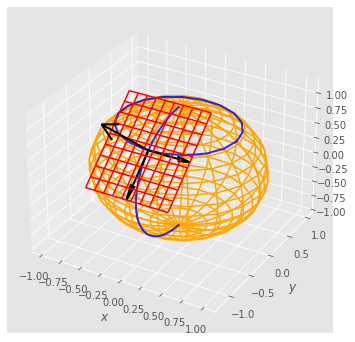

In [5]:
theta0, phi0 = 1*np.pi/4., -1.*np.pi/2.
_, _, grad, vphi, vtheta = gf.sphere_plane(theta0, phi0, 0.5);
print('gradiente   :', grad)
print('v-paralelo  :', vphi)
print('v-meridiano :', vtheta)


*Exercicio* : Sexa a función $f(x, y, z) = x^2 + y^2 + z^2$, e o punto ${\bf x}_0 = \left(0, -1/{\sqrt {2}}, 1/{\sqrt{2}} \right)$, calcula o plano tanxente do conxunto de nivel da función á que pertence o punto.

 O valor da función no punto é $f ({\bf x_0}) = 1$, entón o punto pertence ao conxunto de nivel establecido co valor $c = 1$.

 O conxunto de nivel $f(x, y, z) = 1$ é a esfera de raio unitario: $x^2 + y^2 + z^2 = 1$.

 O punto ${\bf x}_0$, en coordenadas esféricas é $r = 1, \theta = \pi/4, \phi = 3 \pi/2$.



O gradiente da función é: $\nabla f (x, y, z) = (2 x, 2y, 2z)$.

 E no punto ${\bf x}_0$ vale: $\nabla f ({\bf x}_0) = \left(0, -\sqrt{2}, \sqrt{2}\right)$ .

 O plano tanxente, nun punto ${\bf x}_0$ da esfera cumpre coa ecuación:

 $$
 2x_0 (x - x_0) + 2 y_0 (y - y_0) + 2 z_0 (z - z_0) = 0
 $$

 E no punto ${\bf x}_0$ é:

$$
-\sqrt{2} \left( y + \frac{1}{\sqrt{2}} \right) + \sqrt{2} \left( z - \frac{1}{\sqrt{2}} \right) = 0
$$

 Polo tanto, o plano tanxente ten a ecuación:

 $$
 z = y + \sqrt{2}
 $$



**Aínda hai máis!**

 As simetrías en Física son fundamentais. Foi a gran física [Emmy Noether](https://gl.wikipedia.org/wiki/Emmy_Noether) quen formulou un teorema que afirma que detrás dunha simetría hai unha cantidade conservada en física. Por exemplo, se o problema ten simetría esférica, a cantidade conservada é o momento angular.

 Emmy Noether sufriu por desgraza os males do seu tempo (e que aínda persisten no noso), o machismo dos seus compañeiros de universidade e o racismo nazi.



**Isto é todo por agora!**


### Apéndice

 *Proba* da regra da cadea

 As dúas funcións son diferenciables:

$$
{\bf g}({\bf x}+{\bf v}) -{\bf g}({\bf x})  = {\bf Dg}({\bf x})\,{\bf v} 
+ \| {\bf v} \| {\bf E}_g({\bf x,v}) 
$$

$$
{\bf f}({\bf y}+{\bf u}) -{\bf f}({\bf y})  = {\bf Df}({\bf y})\, {\bf u} + \| {\bf u} \| {\bf E}_f({\bf y,u}) 
$$

Como ${\bf u} = {\bf g}({\bf x}+{\bf v}) -{\bf g}({\bf x})$, temos:

$$
{\bf f}({\bf y}+{\bf u}) -{\bf f}({\bf y})  = {\bf Df}({\bf y}) \left( {\bf Dg}({\bf x}) \, {\bf v} + \| {\bf v} \| {\bf E}_g({\bf x,v}) \right) 
+ \| {\bf u} \| {\bf E}_f({\bf y,u}) 
$$

$$
=  {\bf Df}({\bf y}){\bf Dg}({\bf x}) \, {\bf v} + \| {\bf v} \| \left( {\bf Df}({\bf y}) \, {\bf E}_g({\bf x,v})  
+ \frac{\| {\bf u} \|}{\| {\bf v} \|} {\bf E}_f({\bf y,u}) \right) 
$$

Que podemos asociar a:

$$
 {\bf h}({\bf x}+{\bf v}) -{\bf h}({\bf x})  =  {\bf Dh}({\bf x}) \, {\bf v} + \| {\bf v} \| {\bf E}_h ({\bf x,v}) 
 $$

Onde

$$
{\bf Dh}({\bf x}) = {\bf Df}({\bf y}) \, {\bf Dg}({\bf x})
$$

$$
{\bf E}_h({\bf x,v})  = {\bf Df}({\bf y}) \, {\bf E}_g({\bf x,v})  + \frac{\| {\bf u} \|}{\| {\bf v} \|} {\bf E}_f({\bf y,v}) 
$$

 A derivada é o produto das derivadas.


Só fica comprobar que: $\lim_{{\bf v} \to {\bf 0}} {\bf E}_h({\bf x,v}) \to {\bf 0}$.  
    
 O primeiro termo é directo ${\bf E}_g({\bf x,v}) \to {\bf 0}$. 

No segundo podemos acotar, $\frac{\| u \|}{\| v \| } \leq M_g({\bf x}) + \| {\bf E}_g({\bf x,v}) \|$, onde 
$M_g({\bf x}) = \sum_{k=1}^n \| \nabla g_k({\bf x}) \|$.

xa que ${\bf u} = {\bf g(x+v)} - {\bf g(x)} = {\bf Dg}({\bf x}) {\bf v} + \| {\bf v} \| {\bf E}_g({\bf x,v})$ e polo tanto $\| {\bf u} \| \le \left( \sum_{i=1}^n \| \nabla g_k \| + \| {\bf E_g}(y, v) \| \right) \| {\bf v} \|$.

Cando  ${\bf v} \to {\bf 0}$ tamén ${\bf u} \to {\bf 0}$ e ${\bf E}_f({\bf y, u}) \to {\bf 0}$.



